# IMDb Movie Analysis Project

This project aims to analyze an IMDb dataset containing information on various movies, including their budgets, gross revenue, IMDb scores, duration, and release years. Through data cleaning, exploratory data analysis (EDA), and statistical modeling, I seek to understand trends in movie production and success. Key questions I aim to answer include:

- How have movie budgets, gross revenues, and IMDb scores evolved over time?
- What factors contribute most significantly to a movie's success, both in terms of box office gross and audience ratings?
- Can we predict the gross revenue of a movie based on its budget?

In this project, I use data visualization and regression analysis to uncover patterns and relationships within the data. The tools used include Python, Pandas, Matplotlib, Seaborn, and Statsmodels for statistical analysis.


First, I import the necessary libraries that will be used throughout the project. This includes Pandas for data manipulation, Matplotlib and Seaborn for data visualization, NumPy for numerical operations, and Statsmodels for statistical modeling.

In [32]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm

Here, I load the IMDb dataset from a CSV file so I can start analyzing the data. This allows us to work with the real data that contains information about various movies.

In [33]:
# Load the dataset
file_path = 'imdb.csv'
imdb_df = pd.read_csv(file_path)

To understand the structure of the dataset, I take a quick look at the first few rows using `head()` and also get a summary using `info()`. This helps to verify that the data is loaded correctly and identify any missing values or data type issues.

In [34]:
# Display the first few rows of the dataset
imdb_df.head()

,id,duration,gross,movie_title,budget,title_year,imdb_score
0,1,178.0,760505847.0,Avatar,237000000.0,2009.0,7.9
1,2,169.0,309404152.0,Pirates of the Caribbean: At World's End,300000000.0,2007.0,7.1
2,3,148.0,200074175.0,Spectre,245000000.0,2015.0,6.8
3,4,164.0,448130642.0,The Dark Knight Rises,250000000.0,2012.0,8.5
4,5,132.0,73058679.0,John Carter,263700000.0,2012.0,6.6


In [35]:
# Basic information about the dataset
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5042 entries, 0 to 5041
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           5042 non-null   int64  
 1   duration     5028 non-null   float64
 2   gross        4159 non-null   float64
 3   movie_title  5042 non-null   object 
 4   budget       4551 non-null   float64
 5   title_year   4935 non-null   float64
 6   imdb_score   5042 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 275.9+ KB


I calculate descriptive statistics such as mean, median, minimum, and maximum values for the numerical columns in the dataset. This gives me an overview of the data distribution and identifies any potential outliers.

In [36]:
# Descriptive statistics of the numerical features
imdb_statistics = imdb_df.describe()
print(imdb_statistics)

                id     duration         gross        budget   title_year  \
count  5042.000000  5028.000000  4.159000e+03  4.551000e+03  4935.000000   
mean   2521.500000   107.201074  4.846877e+07  3.974997e+07  2002.470517   
std    1455.644359    25.197441  6.845328e+07  2.059195e+08    12.474599   
min       1.000000     7.000000  1.620000e+02  2.180000e+02  1916.000000   
25%    1261.250000    93.000000  5.340988e+06  6.000000e+06  1999.000000   
50%    2521.500000   103.000000  2.550000e+07  2.000000e+07  2005.000000   
75%    3781.750000   118.000000  6.230000e+07  4.500000e+07  2011.000000   
max    5042.000000   511.000000  7.605058e+08  1.220000e+10  2016.000000   

        imdb_score  
count  5042.000000  
mean      6.442007  
std       1.125189  
min       1.600000  
25%       5.800000  
50%       6.600000  
75%       7.200000  
max       9.500000  


# Handling missing values

In this step, I handle missing values to clean up the dataset. I drop rows where `title_year` is missing, as this information is crucial for trend analysis. Then, I fill missing values for `duration`, `gross`, and `budget` with their respective median values to ensure that we can proceed with analysis without missing data issues.

In [37]:
# Drop rows where 'title_year' is missing
imdb_df_cleaned = imdb_df.dropna(subset=['title_year']).copy()

In [38]:
# Fill missing values for 'duration', 'gross', and 'budget' with their median values
imdb_df_cleaned['duration'] = imdb_df_cleaned['duration'].fillna(imdb_df_cleaned['duration'].median())
imdb_df_cleaned['gross'] = imdb_df_cleaned['gross'].fillna(imdb_df_cleaned['gross'].median())
imdb_df_cleaned['budget'] = imdb_df_cleaned['budget'].fillna(imdb_df_cleaned['budget'].median())

I verify that there are no more missing values in the cleaned dataset by using `info()` again. This ensures that the dataset is now ready for analysis

In [39]:
# Check the cleaned data
imdb_df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4935 entries, 0 to 5041
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           4935 non-null   int64  
 1   duration     4935 non-null   float64
 2   gross        4935 non-null   float64
 3   movie_title  4935 non-null   object 
 4   budget       4935 non-null   float64
 5   title_year   4935 non-null   float64
 6   imdb_score   4935 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 308.4+ KB


# Exploratory Data Analysis (EDA)

To start exploring the data, I create histograms for key attributes: `duration`, `gross`, `budget`, and `imdb_score`. This helps me understand the distributions and typical ranges of these features.

In [40]:
# Set up the plotting environment
plt.style.use('seaborn-v0_8-darkgrid')
plt.figure(figsize=(15, 10))

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [41]:
import matplotlib.pyplot as plt
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


Text(0.5, 1.0, 'Distribution of Movie Duration')

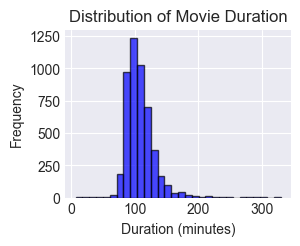

In [42]:
# Histogram for 'duration'
plt.subplot(2, 2, 1)
plt.hist(imdb_df_cleaned['duration'], bins=30, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel('Duration (minutes)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Duration')

Text(0.5, 1.0, 'Distribution of Gross Revenue')

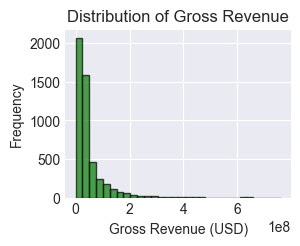

In [43]:
# Histogram for 'gross'
plt.subplot(2, 2, 2)
plt.hist(imdb_df_cleaned['gross'], bins=30, color='green', edgecolor='black', alpha=0.7)
plt.xlabel('Gross Revenue (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Gross Revenue')

Text(0.5, 1.0, 'Distribution of Movie Budget')

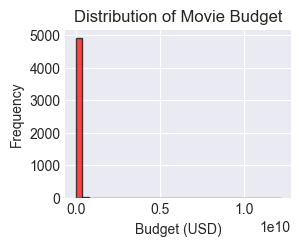

In [44]:
# Histogram for 'budget'
plt.subplot(2, 2, 3)
plt.hist(imdb_df_cleaned['budget'], bins=30, color='red', edgecolor='black', alpha=0.7)
plt.xlabel('Budget (USD)')
plt.ylabel('Frequency')
plt.title('Distribution of Movie Budget')

Text(0.5, 1.0, 'Distribution of IMDb Scores')

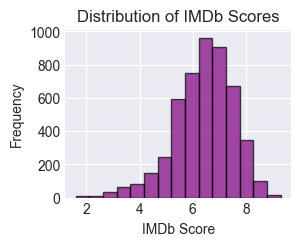

In [45]:
# Histogram for 'imdb_score'
plt.subplot(2, 2, 4)
plt.hist(imdb_df_cleaned['imdb_score'], bins=15, color='purple', edgecolor='black', alpha=0.7)
plt.xlabel('IMDb Score')
plt.ylabel('Frequency')
plt.title('Distribution of IMDb Scores')

In [46]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Yearly Trends Analysis

Next, I calculate yearly averages for `budget`, `gross`, and `imdb_score` to analyze trends over time. This helps to see if movie budgets, revenues, or IMDb ratings have changed over the years.

In [47]:
# Calculate average budget, gross, and IMDb score by year
yearly_stats = imdb_df_cleaned.groupby('title_year').agg({'budget': 'mean', 'gross': 'mean', 'imdb_score': 'mean'}).reset_index()
print(yearly_stats)

    title_year        budget         gross  imdb_score
0       1916.0  3.859070e+05  2.550000e+07    8.000000
1       1920.0  1.000000e+05  3.000000e+06    4.800000
2       1925.0  2.450000e+05  2.550000e+07    8.300000
3       1927.0  6.000000e+06  2.643500e+04    8.300000
4       1929.0  1.018950e+07  1.408975e+06    7.150000
..         ...           ...           ...         ...
86      2012.0  3.894276e+07  5.609210e+07    6.266516
87      2013.0  3.836091e+07  4.969796e+07    6.369620
88      2014.0  3.392702e+07  4.997159e+07    6.228175
89      2015.0  3.668021e+07  5.145343e+07    6.033628
90      2016.0  5.214858e+07  6.140619e+07    6.399057

[91 rows x 4 columns]


In [48]:
# Set up the plotting environment
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

Text(0.5, 1.0, 'Average Budget of Movies Over the Years')

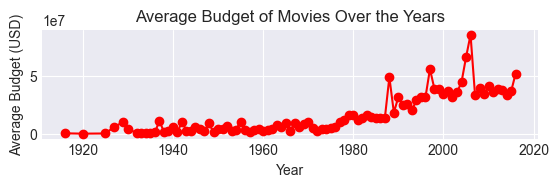

In [49]:
# Line plot for Average Budget over the Years
plt.subplot(3, 1, 1)
plt.plot(yearly_stats['title_year'], yearly_stats['budget'], marker='o', linestyle='-', color='red')
plt.xlabel('Year')
plt.ylabel('Average Budget (USD)')
plt.title('Average Budget of Movies Over the Years')

Text(0.5, 1.0, 'Average Gross Revenue of Movies Over the Years')

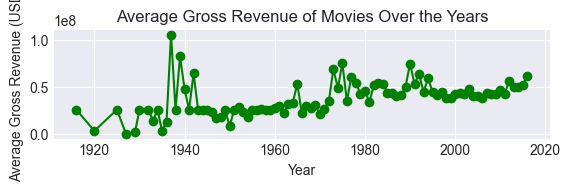

In [50]:
# Line plot for Average Gross over the Years
plt.subplot(3, 1, 2)
plt.plot(yearly_stats['title_year'], yearly_stats['gross'], marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Average Gross Revenue (USD)')
plt.title('Average Gross Revenue of Movies Over the Years')

Text(0.5, 1.0, 'Average IMDb Score of Movies Over the Years')

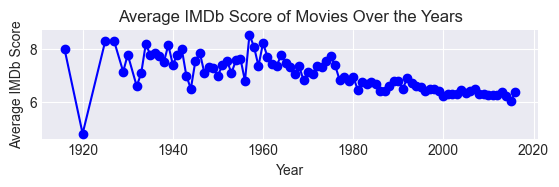

In [51]:
# Line plot for Average IMDb Score over the Years
plt.subplot(3, 1, 3)
plt.plot(yearly_stats['title_year'], yearly_stats['imdb_score'], marker='o', linestyle='-', color='blue')
plt.xlabel('Year')
plt.ylabel('Average IMDb Score')
plt.title('Average IMDb Score of Movies Over the Years')

In [52]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

# Correlation Analysis

To understand how the different numerical attributes are related to each other, I calculate and visualize the correlation matrix. This helps identify strong relationships that might be useful for prediction.

In [53]:
# Calculate the correlation matrix
correlation_matrix = imdb_df_cleaned[['duration', 'gross', 'budget', 'imdb_score']].corr()

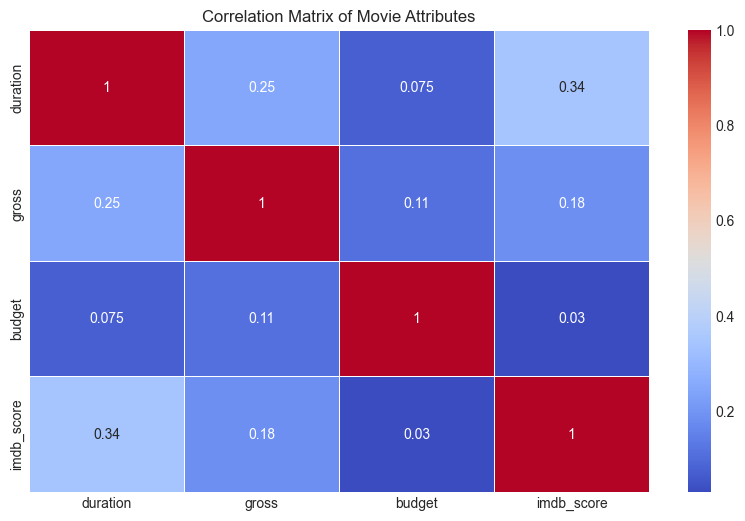

In [54]:
# Plot a heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix of Movie Attributes')
plt.show()

# Regression Analysis: Predicting Gross Revenue from Budget


To understand the relationship between a movie's budget and its gross revenue, I perform a regression analysis. First, I filter out budget outliers above the 95th percentile to avoid skewing the results.


In [55]:
# Filter out budget outliers above the 95th percentile
budget_threshold = imdb_df_cleaned['budget'].quantile(0.95)
filtered_df = imdb_df_cleaned[imdb_df_cleaned['budget'] <= budget_threshold]

In [56]:
# Define the predictor (budget) and response (gross) variables for the filtered data
X_filtered = filtered_df['budget']
Y_filtered = filtered_df['gross']

In [57]:
# Add a constant to the predictor variable
X_filtered = sm.add_constant(X_filtered)

In [58]:
# Create the model and fit it
model_filtered = sm.OLS(Y_filtered, X_filtered).fit()

In [59]:
# Print the regression results
print(model_filtered.summary())

                            OLS Regression Results                            
Dep. Variable:                  gross   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.271
Method:                 Least Squares   F-statistic:                     1744.
Date:                Thu, 10 Oct 2024   Prob (F-statistic):               0.00
Time:                        23:28:05   Log-Likelihood:                -89079.
No. Observations:                4697   AIC:                         1.782e+05
Df Residuals:                    4695   BIC:                         1.782e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.273e+07    8.6e+05     14.808      0.0

## Plotting the Regression Line

Finally, I plot the regression line to visualize how well the budget predicts the gross revenue. This helps provide a clear picture of the relationship between these two variables.

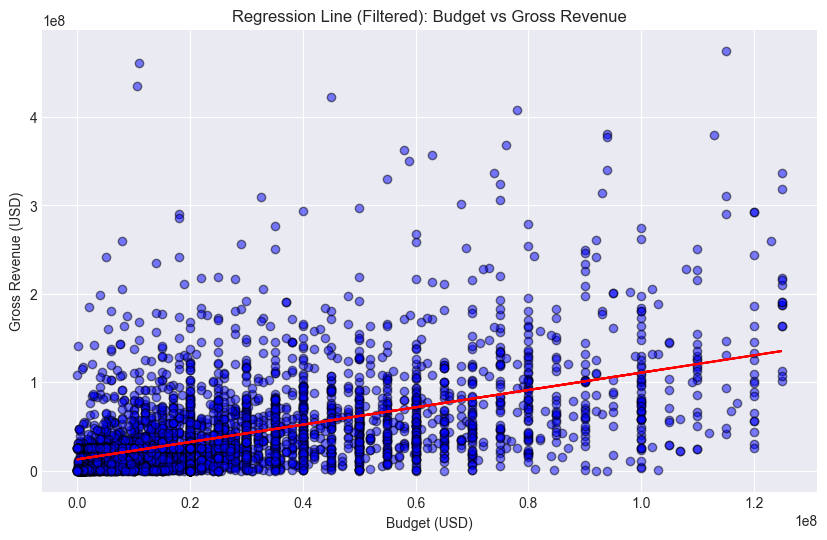

In [60]:
# Plotting regression line with filtered data
plt.figure(figsize=(10, 6))
plt.scatter(filtered_df['budget'], filtered_df['gross'], alpha=0.5, color='blue', edgecolor='k')
plt.plot(filtered_df['budget'], model_filtered.predict(X_filtered), color='red')
plt.xlabel('Budget (USD)')
plt.ylabel('Gross Revenue (USD)')
plt.title('Regression Line (Filtered): Budget vs Gross Revenue')
plt.show()

### Author: Darsh Chaurasia